In [1]:
!pip install xlrd>=2.0.1
# import pandas for structuring the data
import pandas as pd

# import numpy for numerical analysis
import numpy as np

# import libs for diagrams inline with the text
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# other utilities
from sklearn import datasets, preprocessing, metrics
from scipy.stats import shapiro
from sklearn.decomposition import PCA

In [2]:
white_wine_df=pd.read_excel(r'C:\Users\freed\Desktop\DAT\DAT4\BI\week3\MP2\winequality-white.xlsx', header=1)
red_wine_df=pd.read_excel(r'C:\Users\freed\Desktop\DAT\DAT4\BI\week3\MP2\winequality-red.xlsx', header=1)

In [3]:
white_wine_df.shape

(4898, 12)

In [4]:
red_wine_df.shape

(1599, 12)

In [5]:
white_wine_df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [6]:
red_wine_df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [7]:
# Add a new column to identify the wine type
red_wine_df['wine_type'] = 'red'
white_wine_df['wine_type'] = 'white'

In [8]:
# Concatenate the two dataframes
merged_data = pd.concat([red_wine_df, white_wine_df], ignore_index=True)

In [9]:
merged_data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6497.000000  6497.000000  6497.000000  6497.000000  
mean      3.218501     0.531268    10.491801     5.818378  
std       0.160787     0.148806     1.192712     0.873255  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

In [10]:
merged_data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
wine_type                object
dtype: object

In [11]:
list(merged_data)

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality',
 'wine_type']

In [12]:
# Check normality using Shapiro-Wilk test
numeric_columns = merged_data.select_dtypes(include='number').columns
for column in numeric_columns:
    stat, p_value = shapiro(merged_data[column])
    print(f"\nShapiro-Wilk test for {column}:")
    print(f"Statistic: {stat}, p-value: {p_value}")
    if p_value < 0.05:
        print(f"The data for {column} is not normally distributed.")
    else:
        print(f"The data for {column} appears to be normally distributed.")


Shapiro-Wilk test for fixed acidity:
Statistic: 0.8797879815101624, p-value: 0.0
The data for fixed acidity is not normally distributed.

Shapiro-Wilk test for volatile acidity:
Statistic: 0.875862181186676, p-value: 0.0
The data for volatile acidity is not normally distributed.

Shapiro-Wilk test for citric acid:
Statistic: 0.9649786353111267, p-value: 5.271599623843331e-37
The data for citric acid is not normally distributed.

Shapiro-Wilk test for residual sugar:
Statistic: 0.824682354927063, p-value: 0.0
The data for residual sugar is not normally distributed.

Shapiro-Wilk test for chlorides:
Statistic: 0.6183151602745056, p-value: 0.0
The data for chlorides is not normally distributed.

Shapiro-Wilk test for free sulfur dioxide:
Statistic: 0.9412973523139954, p-value: 5.605193857299268e-45
The data for free sulfur dioxide is not normally distributed.

Shapiro-Wilk test for total sulfur dioxide:
Statistic: 0.9825838208198547, p-value: 1.5920966626574383e-27
The data for total sul

C:\Users\freed\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [13]:
# Use labels from the first row as x-axis labels
x_labels = merged_data.loc[0, numeric_columns]

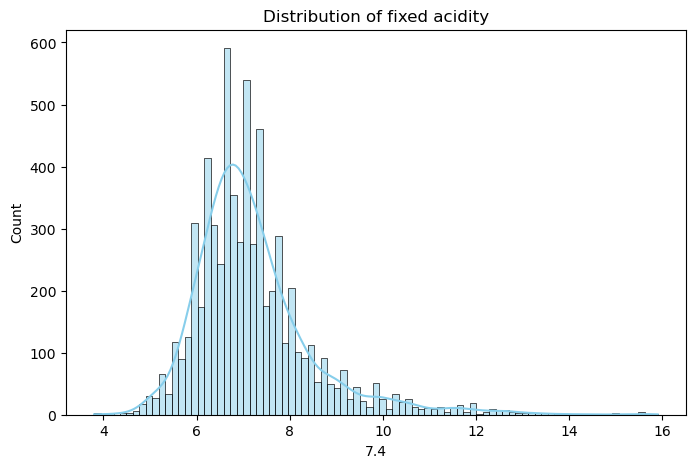

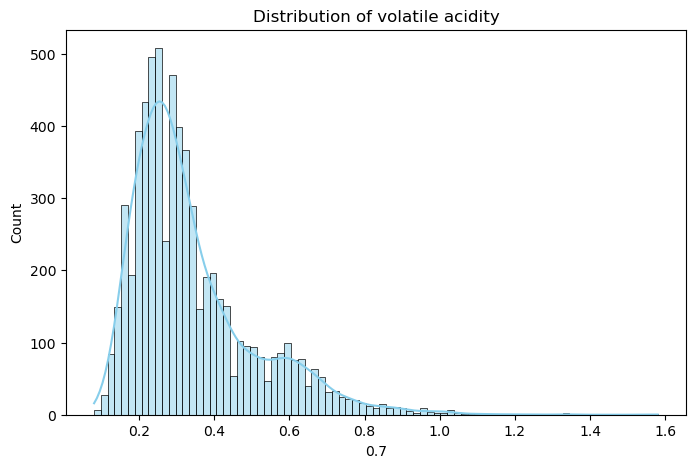

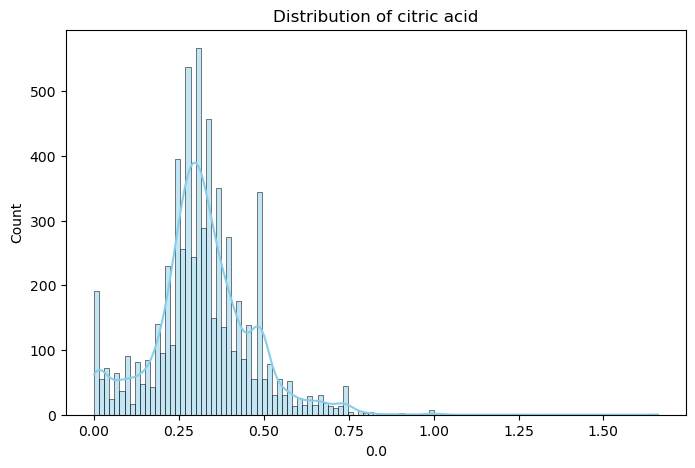

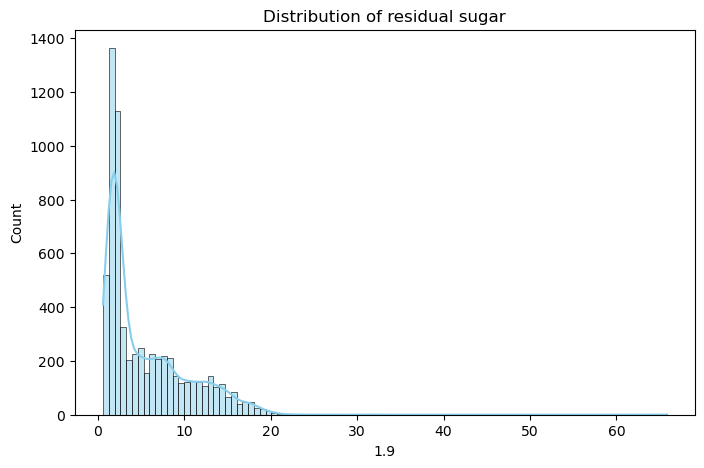

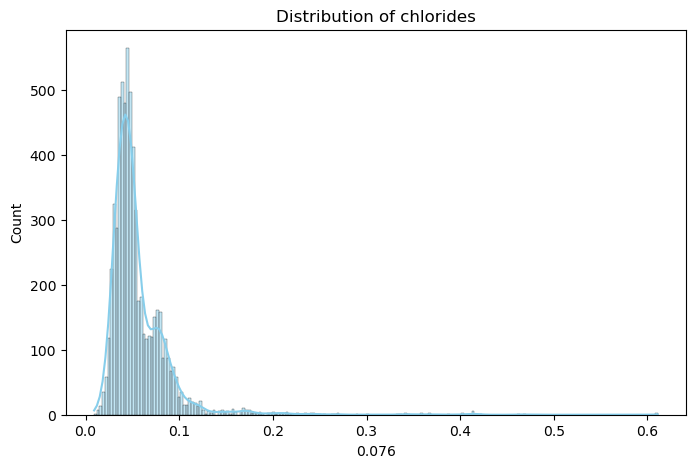

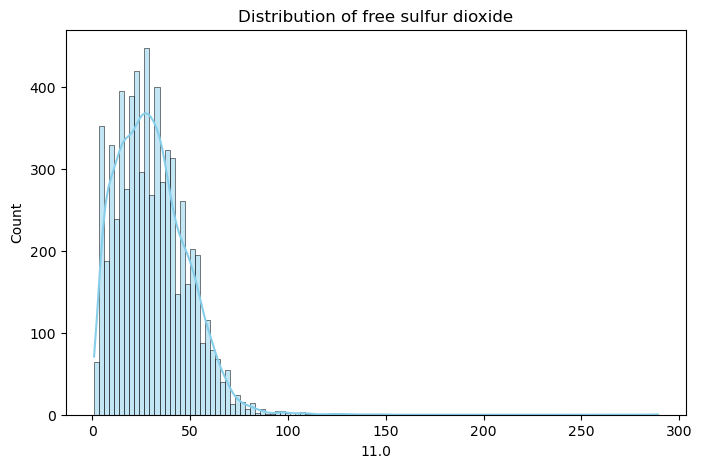

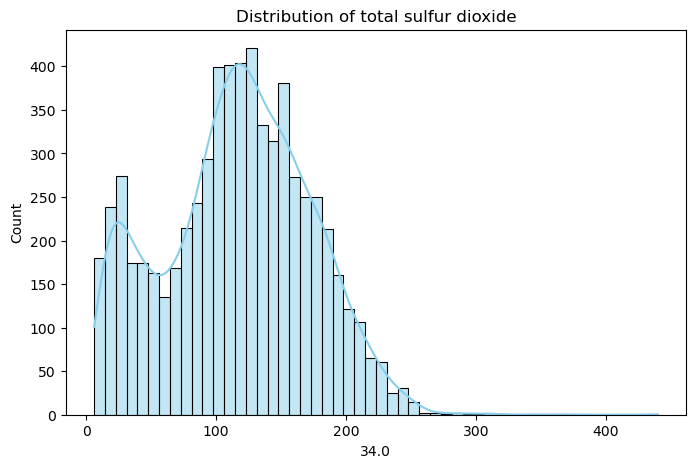

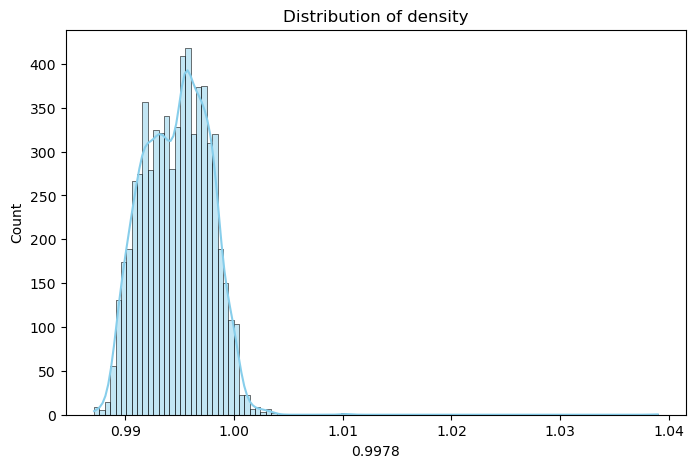

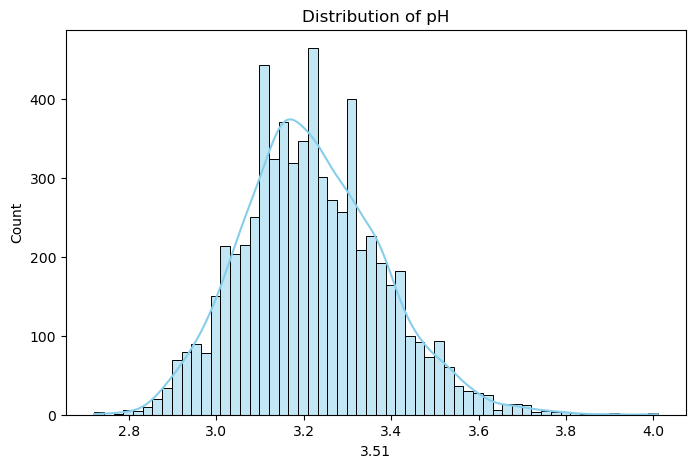

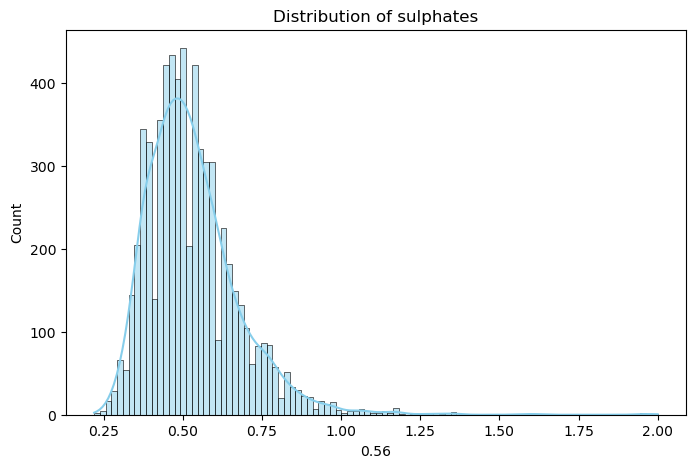

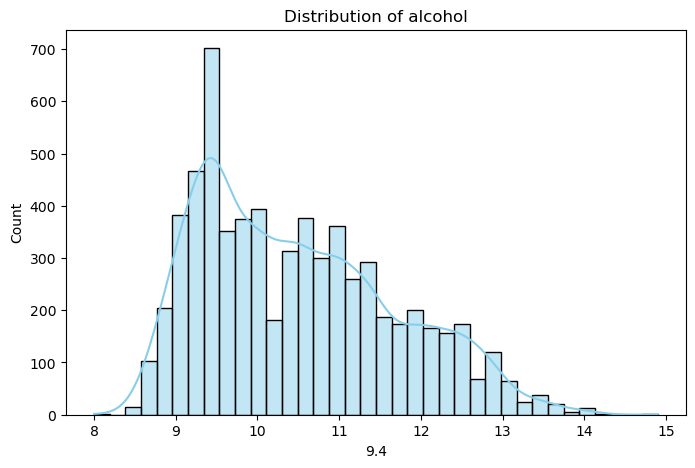

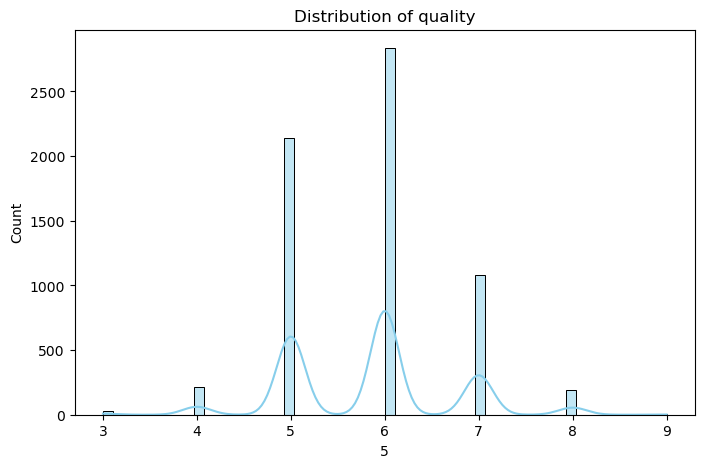

In [14]:
# Visualize the distribution of numeric columns using Seaborn
for column in numeric_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(merged_data[column], kde=True, color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(x_labels[column])  # Set x-axis label
    plt.show()

C:\Users\freed\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


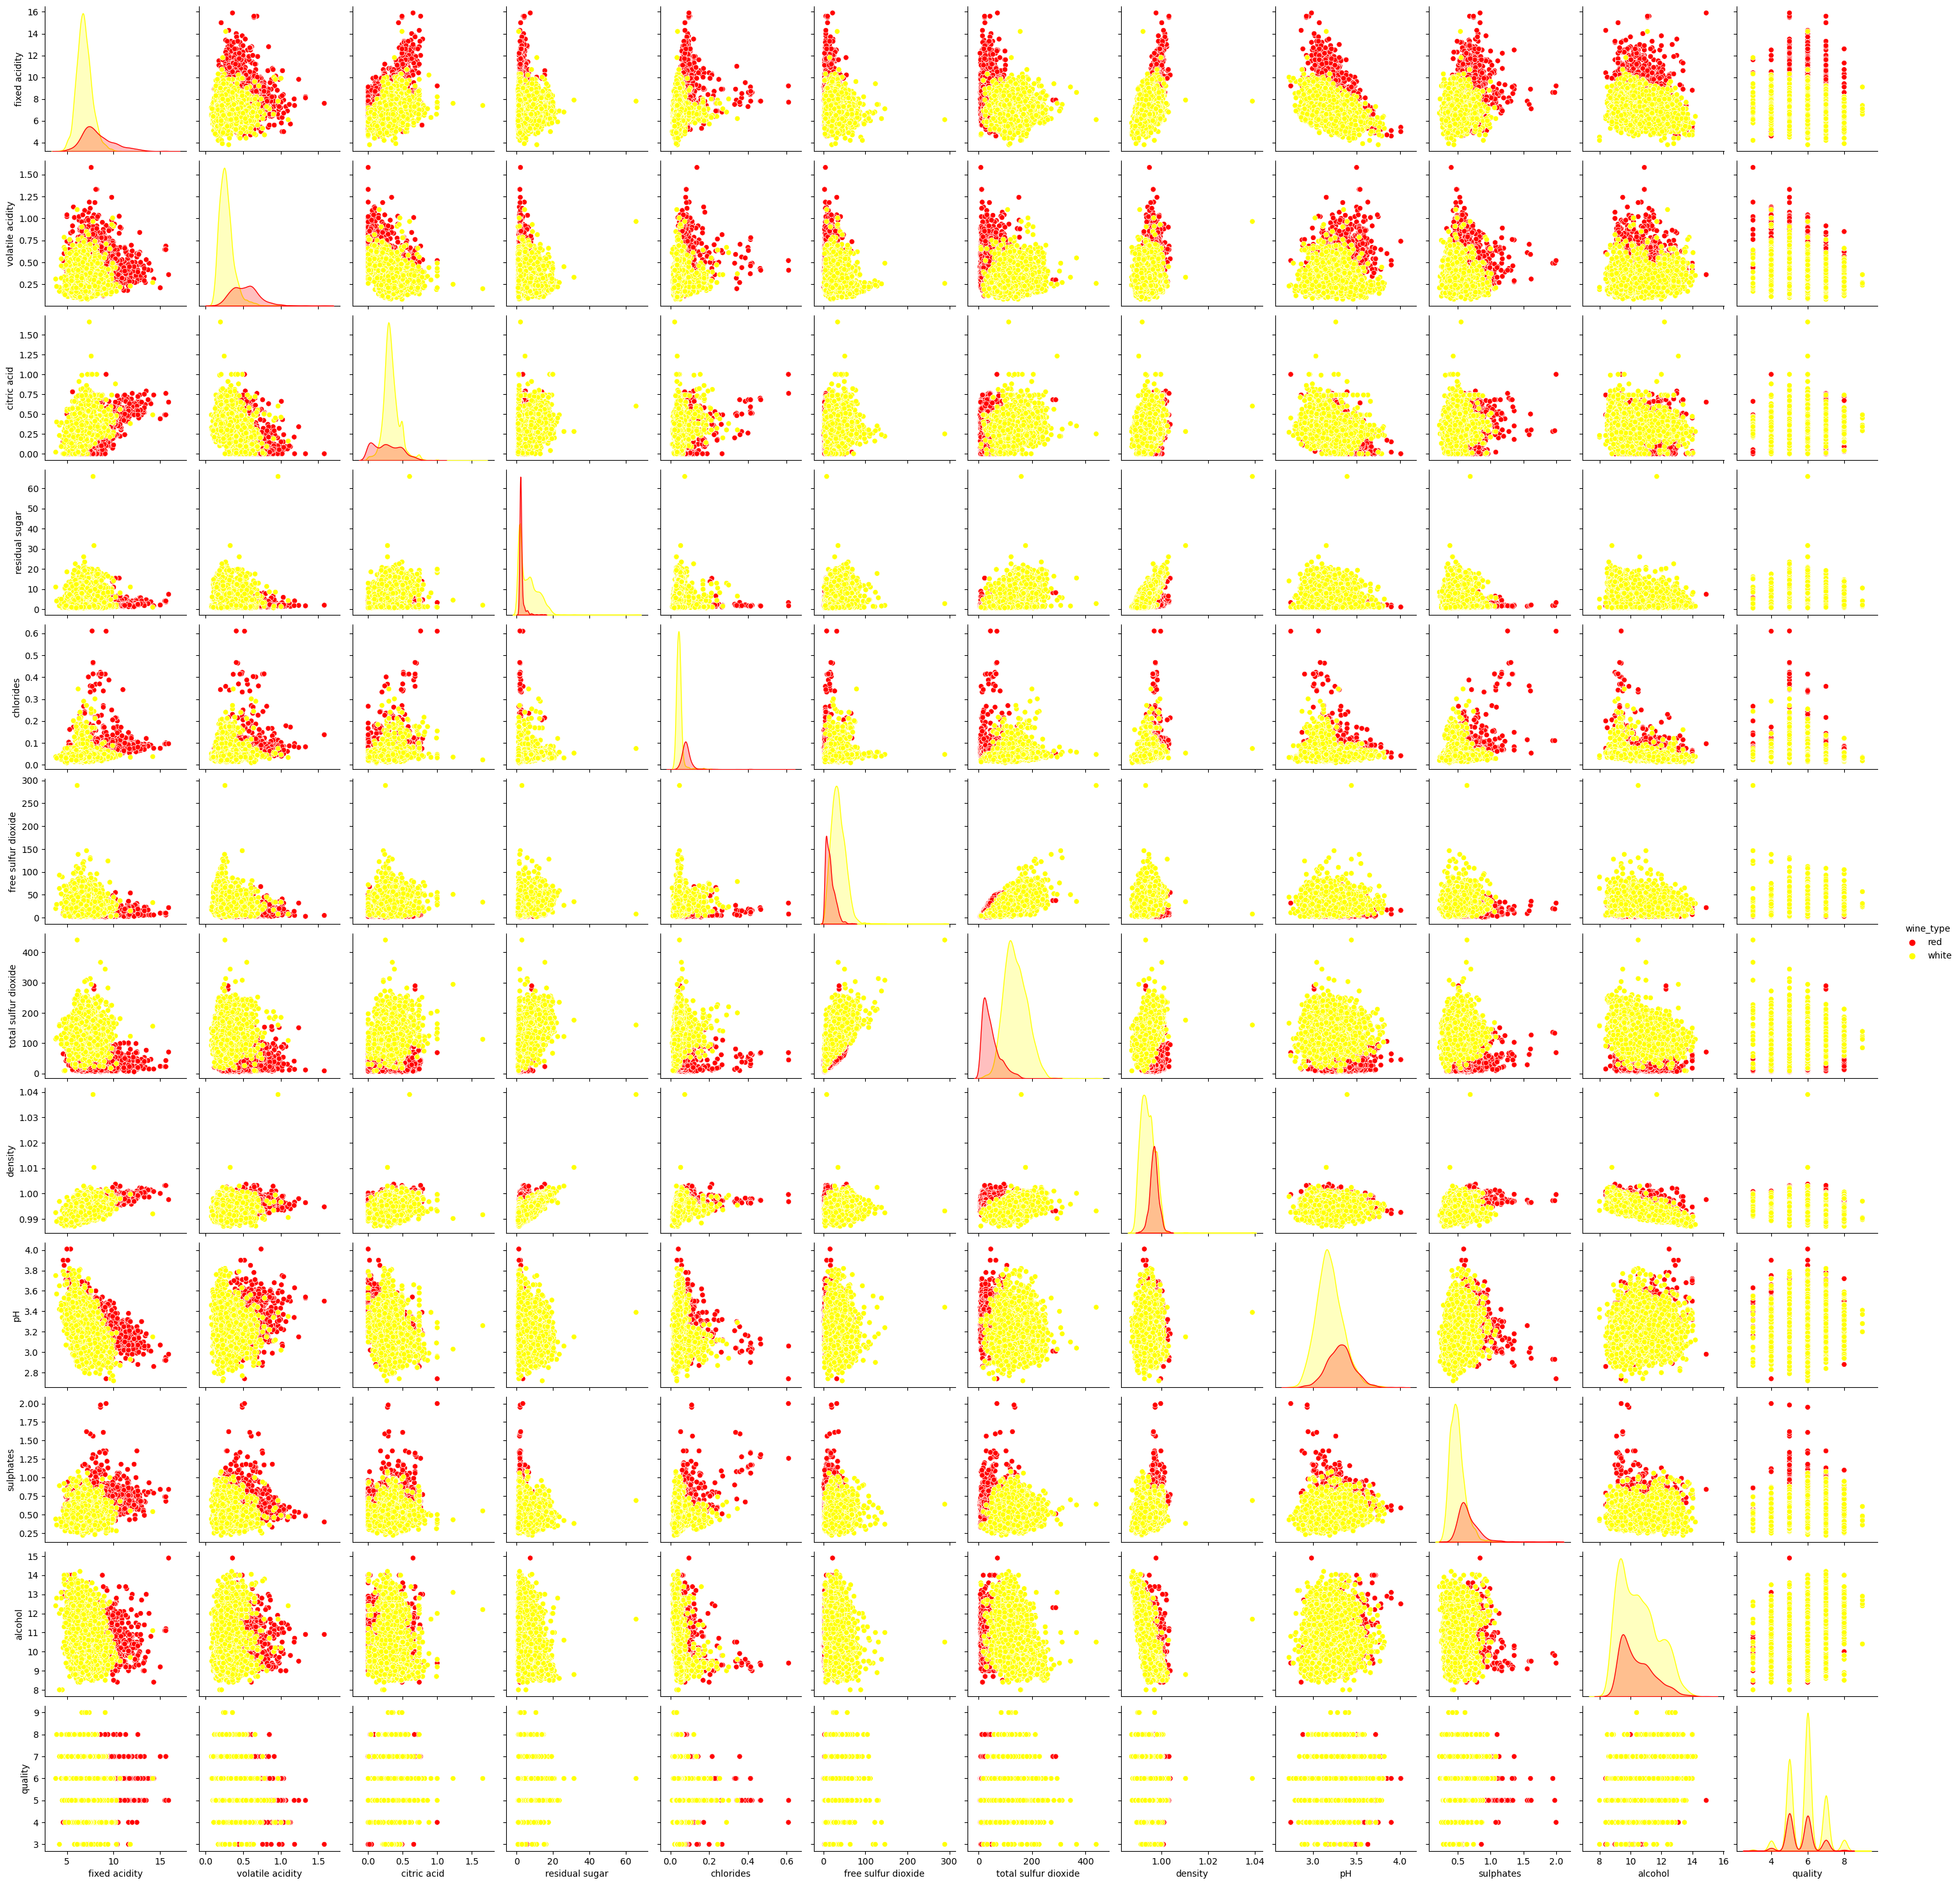

In [15]:
# 5. Visualize the differences between red and white wine samples
# Create a pairplot to show relationships between numeric variables
sns.pairplot(merged_data, hue='wine_type', palette={'red': 'red', 'white': 'yellow'})
plt.show()

In [16]:
# Create subsets by binning the attribute 'pH' (Five subsets)
merged_data['pH_bin_5'] = pd.cut(merged_data['pH'], bins=5)

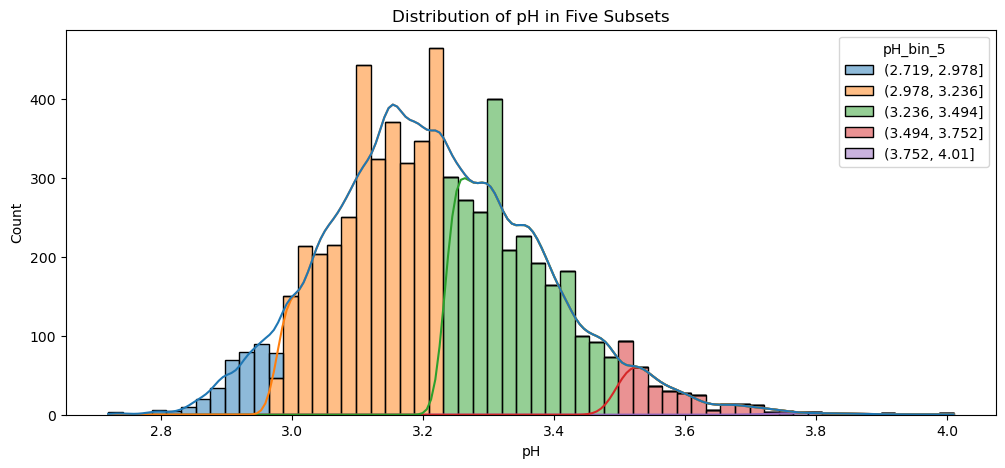

In [17]:
# Visualize the distribution of 'pH' in each bin for five subsets
plt.figure(figsize=(12, 5))
sns.histplot(data=merged_data, x='pH', hue='pH_bin_5', multiple="stack", kde=True)
plt.title('Distribution of pH in Five Subsets')
plt.show()

In [18]:
# Create subsets by binning the attribute 'pH' (Ten subsets)
merged_data['pH_bin_10'] = pd.cut(merged_data['pH'], bins=10)


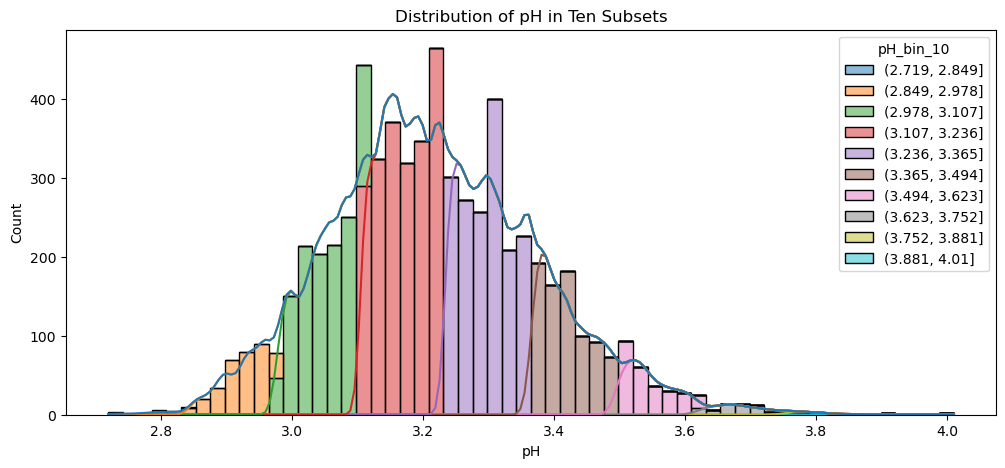

In [19]:
# Visualize the distribution of 'pH' in each bin for ten subsets
plt.figure(figsize=(12, 5))
sns.histplot(data=merged_data, x='pH', hue='pH_bin_10', multiple="stack", kde=True)
plt.title('Distribution of pH in Ten Subsets')
plt.show()

In [20]:
# Identify the subset with the highest density for five subsets
max_density_subset_5 = merged_data['pH_bin_5'].value_counts().idxmax()
print(f"Subset with highest density (Five subsets): {max_density_subset_5}")

Subset with highest density (Five subsets): (2.978, 3.236]


In [21]:
# Identify the subset with the highest density for ten subsets
max_density_subset_10 = merged_data['pH_bin_10'].value_counts().idxmax()
print(f"Subset with highest density (Ten subsets): {max_density_subset_10}")

Subset with highest density (Ten subsets): (3.107, 3.236]


In [22]:
# Select only numeric columns for the correlation matrix
#we can't just use this:correlation_matrix = merged_data.corr(), because we have string types
numeric_columns = merged_data.select_dtypes(include='number').columns
correlation_matrix = merged_data[numeric_columns].corr()

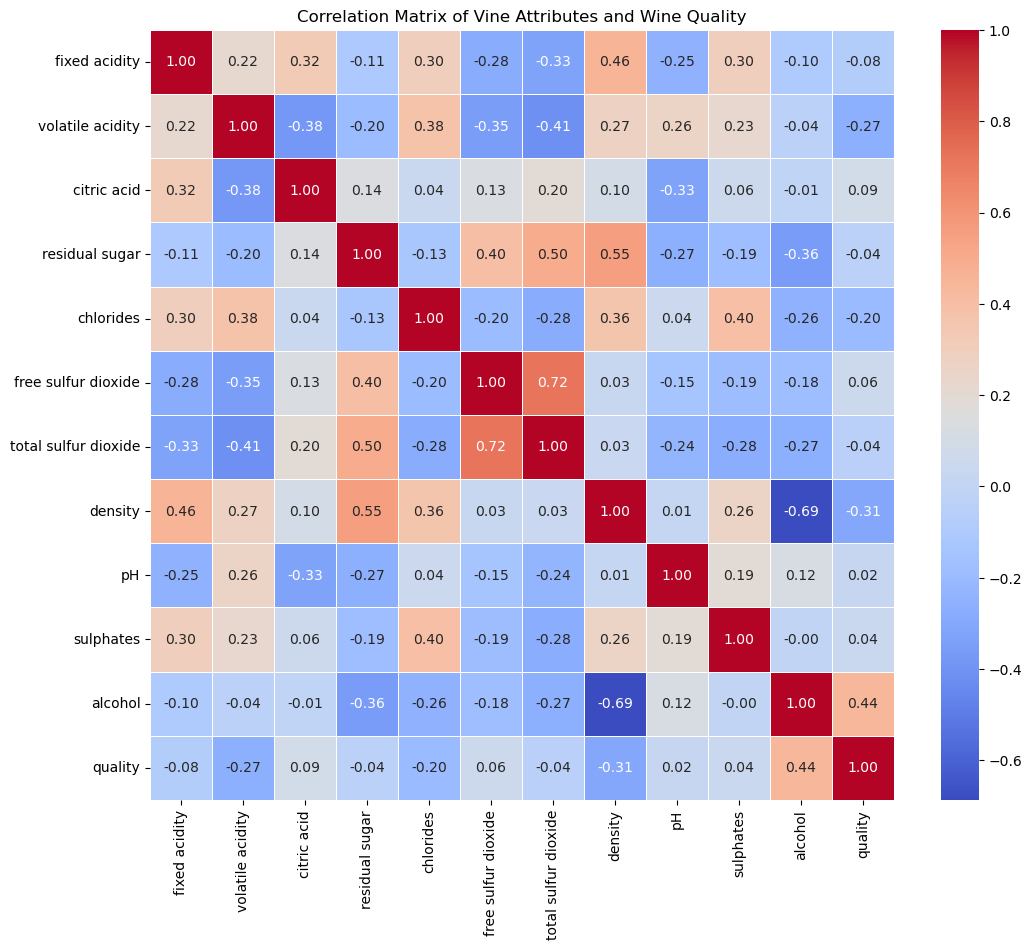

In [23]:
# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Vine Attributes and Wine Quality')
plt.show()

In [24]:
# Print correlation values for "quality"
quality_correlations = correlation_matrix['quality'].sort_values(ascending=False)
print("Correlation values for wine quality:")
print(quality_correlations)

Correlation values for wine quality:
quality                 1.000000
alcohol                 0.444319
citric acid             0.085532
free sulfur dioxide     0.055463
sulphates               0.038485
pH                      0.019506
residual sugar         -0.036980
total sulfur dioxide   -0.041385
fixed acidity          -0.076743
chlorides              -0.200666
volatile acidity       -0.265699
density                -0.305858
Name: quality, dtype: float64


In [25]:
# Create a correlation matrix red wine
numeric_columns = red_wine_df.select_dtypes(include='number').columns
correlation_matrix_red = red_wine_df[numeric_columns].corr()

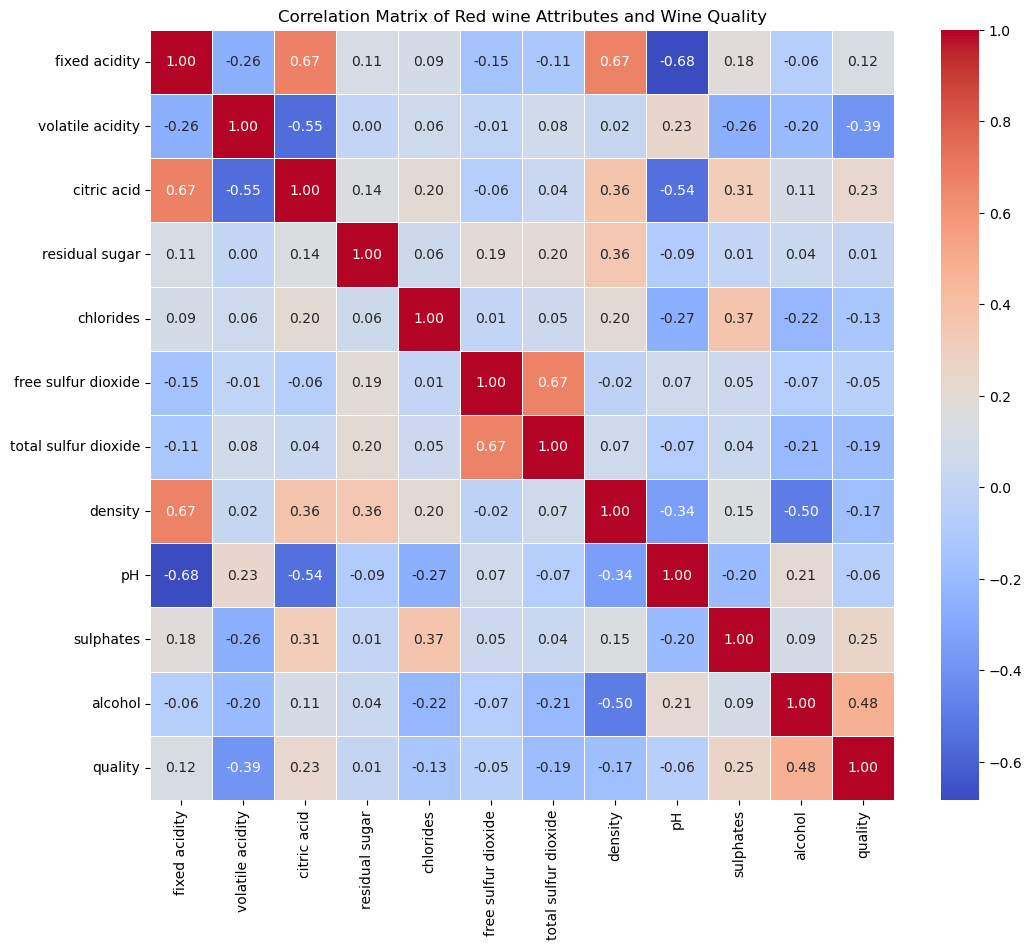

In [26]:
# Create a heatmap for red wine
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_red, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Red wine Attributes and Wine Quality')
plt.show()

In [27]:
# Create a correlation matrix white wine
numeric_columns = white_wine_df.select_dtypes(include='number').columns
correlation_matrix_white = white_wine_df[numeric_columns].corr()

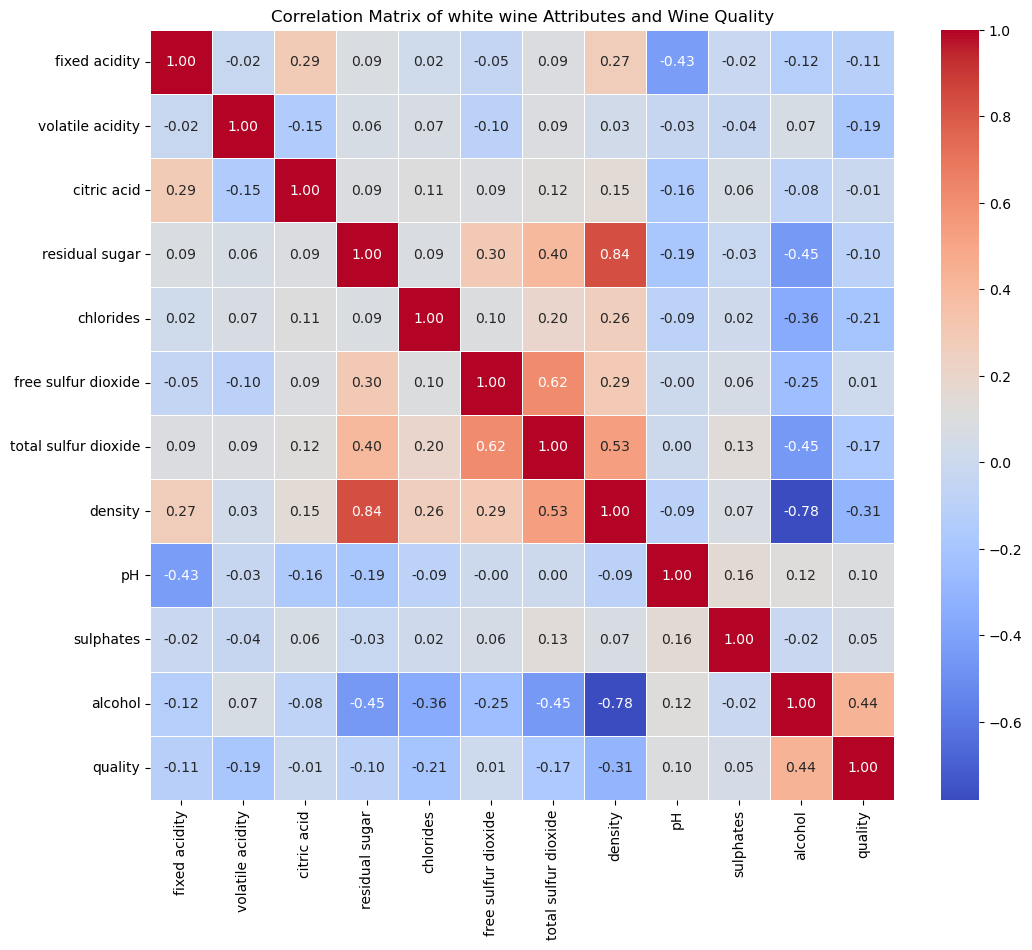

In [28]:
# Create a heatmap for white wine
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_white, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of white wine Attributes and Wine Quality')
plt.show()

In [29]:
#Prepare the data for further analysis

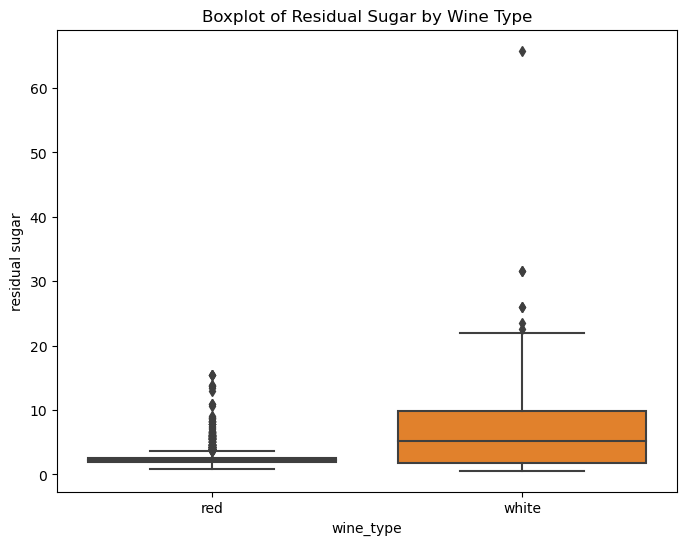

In [30]:
# Explore the 'residual sugar' feature using a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='wine_type', y='residual sugar', data=merged_data)
plt.title('Boxplot of Residual Sugar by Wine Type')
plt.show()

In [31]:
# Identify and remove outliers
outlier_threshold = 2  # Adjust this threshold based on the data distribution
red_wine_outliers = merged_data[(merged_data['wine_type'] == 'red') & (merged_data['residual sugar'] > outlier_threshold)]
white_wine_outliers = merged_data[(merged_data['wine_type'] == 'white') & (merged_data['residual sugar'] > outlier_threshold)]

In [32]:
# Display identified outliers
print("Red Wine Outliers:")
print(red_wine_outliers)

Red Wine Outliers:
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
9               7.5             0.500         0.36             6.1      0.071   
11              7.5             0.500         0.36             6.1      0.071   
14              8.9             0.620         0.18             3.8      0.176   
...             ...               ...          ...             ...        ...   
1589            6.6             0.725         0.20             7.8      0.073   
1592            6.3             0.510         0.13             2.3      0.076   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1598            6.0             0.310         0.47             3.6      0.067   

      fr

In [33]:
print("\nWhite Wine Outliers:")
print(white_wine_outliers)


White Wine Outliers:
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1599            7.0             0.270         0.36           20.70      0.045   
1601            8.1             0.280         0.40            6.90      0.050   
1602            7.2             0.230         0.32            8.50      0.058   
1603            7.2             0.230         0.32            8.50      0.058   
1604            8.1             0.280         0.40            6.90      0.050   
...             ...               ...          ...             ...        ...   
6484            6.6             0.340         0.40            8.10      0.046   
6485            6.2             0.210         0.28            5.70      0.028   
6488            4.9             0.235         0.27           11.75      0.030   
6489            6.1             0.340         0.29            2.20      0.036   
6493            6.6             0.320         0.36            8.00      0.047   

     

In [34]:
# Remove identified outliers
merged_data_no_outliers = merged_data.drop(red_wine_outliers.index.union(white_wine_outliers.index))

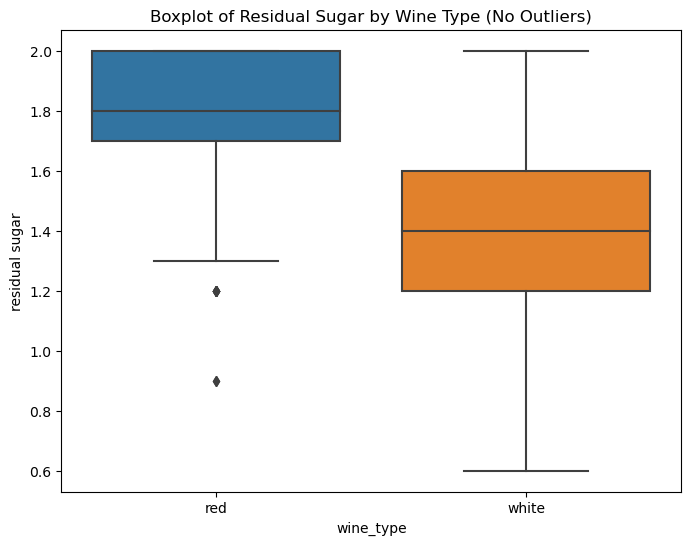

In [35]:
# Check if the outliers were successfully removed
plt.figure(figsize=(8, 6))
sns.boxplot(x='wine_type', y='residual sugar', data=merged_data_no_outliers)
plt.title('Boxplot of Residual Sugar by Wine Type (No Outliers)')
plt.show()

In [36]:
# Calculate correlation values with 'quality'
# Select only numeric columns for the correlation matrix
numeric_columns = merged_data.select_dtypes(include='number').columns
correlations = merged_data[numeric_columns].corr()['quality']

In [37]:
# Identify the attribute with the lowest correlation
lowest_corr_attribute = correlations.idxmin()
lowest_corr_value = correlations.min()

In [38]:
print(f"Attribute with the lowest correlation to wine quality: {lowest_corr_attribute}")
print(f"Correlation value: {lowest_corr_value}")

Attribute with the lowest correlation to wine quality: density
Correlation value: -0.3058579060694202


In [39]:
# Remove the attribute with the lowest correlation
merged_data_no_low_corr = merged_data.drop(lowest_corr_attribute, axis=1)

In [40]:
# Display the resulting dataframe
print("\nDataframe after removing the attribute with the lowest correlation:")
print(merged_data_no_low_corr.head())


Dataframe after removing the attribute with the lowest correlation:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide    pH  sulphates  alcohol  \
0                 11.0                  34.0  3.51       0.56      9.4   
1                 25.0                  67.0  3.20       0.68      9.8   
2                 15.0                  54.0  3.26       0.65      9.8   
3                 17.0                  60.0  3.16       0.58      9.8   
4                 11.0                  34.0  3.51       0.56      9.4   

   quality wine_t

In [41]:
#Transform the categorical data into numeric
# One-hot encode the 'wine_type' column
merged_data_encoded = pd.get_dummies(merged_data, columns=['wine_type'], drop_first=True)

In [47]:
# Display the resulting dataframe
print("Dataframe after one-hot encoding:")
print(merged_data_encoded.head())

Dataframe after one-hot encoding:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality        pH_bin_5       pH_bin_10 

In [44]:
# Drop non-numeric columns for PCA
numeric_columns = merged_data.select_dtypes(include='number').columns
data_for_pca = merged_data[numeric_columns]

In [45]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_pca)

In [46]:
# Apply PCA
pca = PCA()
pca.fit(scaled_data)

PCA()

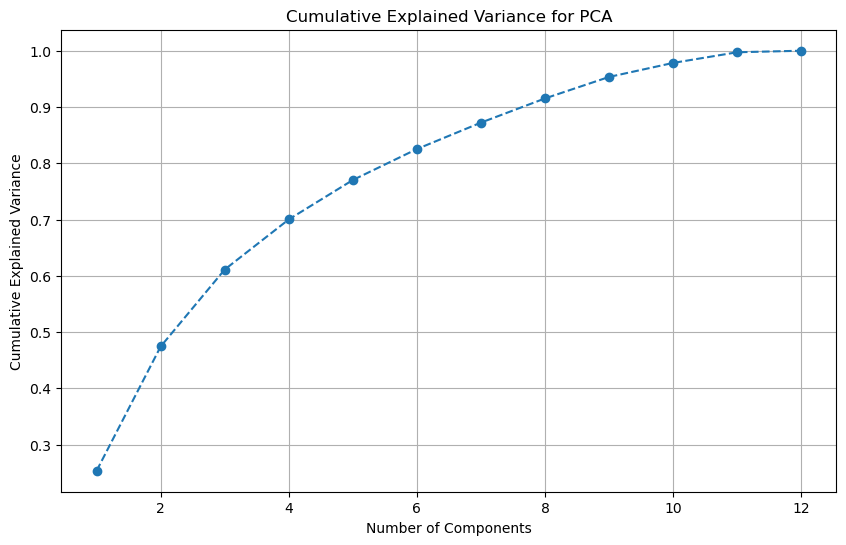

In [48]:
# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance for PCA')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [49]:
desired_variance_ratio = 0.95
n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= desired_variance_ratio) + 1
print(f"Number of components for {desired_variance_ratio * 100}% variance: {n_components}")

Number of components for 95.0% variance: 9


In [ ]:
#so by using 9 principal components in PCA, we capture aprox. 95% of the total variance % in our original data.

In [50]:
# final dataset to choose random
final_dataset_sample = merged_data_encoded.sample(n=10, random_state=42)

In [51]:
# Print the sample
print("Ten Random Rows from the Final Dataset:")
print(final_dataset_sample)

Ten Random Rows from the Final Dataset:
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
3103            7.0              0.17         0.74            12.8      0.045   
1419            7.7              0.64         0.21             2.2      0.077   
4761            6.8              0.39         0.34             7.4      0.020   
4690            6.3              0.28         0.47            11.2      0.040   
4032            7.4              0.35         0.20            13.9      0.054   
1297            7.2              0.53         0.14             2.1      0.064   
1773            7.5              0.27         0.31            17.7      0.051   
5584            6.8              0.11         0.27             8.6      0.044   
561             9.0              0.44         0.49             2.4      0.078   
5946            7.1              0.23         0.30             2.6      0.034   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulp